In [1]:
!pip3 install keras

    100% |████████████████████████████████| 378kB 2.2MB/s ta 0:00:01
    100% |████████████████████████████████| 276kB 2.0MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/62/20/4d43e141b5bc426ba38274933ef8e76e85c7adea2c321ecf9ebf7421cedf/numpy-1.18.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/65/eb/1f97cb97bfc2390a276969c6fae16075da282f5058082d4cb10c6c5c1dba/six-1.14.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/dc/29/162476fd44203116e7980cfbd9352eef9db37c49445d1fec35509022f6aa/scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/60/06/cafdd44889200e5438b897388f3075b52a8ef01f28a17366d91de0fa2d05/h5py-2.10.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.

In [2]:
!pwd

/home/sonthanhnguyen/flowers


In [5]:
!ls

flowers  Hello.ipynb


In [6]:
!pip3 install scikit-learn

  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 7.1MB 271kB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/62/20/4d43e141b5bc426ba38274933ef8e76e85c7adea2c321ecf9ebf7421cedf/numpy-1.18.1-cp36-cp36m-manylinux1_x86_64.whl
  Cache entry deserialization failed, entry ignored
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 296kB 4.1MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/dc/29/162476fd44203116e7980cfbd9352eef9db37c49445d1fec35509022f6aa/scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl


In [8]:
!pip3 install matplotlib opencv-python 

  Using cached https://files.pythonhosted.org/packages/e6/fc/5889757c4c70c552f56fddc8fbdcab565475686cdebdfa1806a9d54cd53b/matplotlib-3.2.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/68/c5/09a1b82f940805c2cee30c3c42786651edcfd0710a0283eb09c6bc959340/opencv_python-4.2.0.32-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f8/a1/5742b56282449b1c0968197f63eae486eca2c35dcd334bab75ad524e0de1/kiwisolver-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5d/bc/1e58593167fade7b544bfe9502a26dc860940a79ab306e651e7f13be68c2/pyparsing-2.4.6-py2.py3-none-any.w

In [117]:
!pip3 install tflearn

    100% |████████████████████████████████| 102kB 708kB/s a 0:00:011
  Using cached https://files.pythonhosted.org/packages/62/20/4d43e141b5bc426ba38274933ef8e76e85c7adea2c321ecf9ebf7421cedf/numpy-1.18.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/65/eb/1f97cb97bfc2390a276969c6fae16075da282f5058082d4cb10c6c5c1dba/six-1.14.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/19/5e/23dcc0ce3cc2abe92efd3cd61d764bee6ccdf1b667a1fb566f45dc249953/Pillow-7.0.0-cp36-cp36m-manylinux1_x86_64.whl
  Running setup.py bdist_wheel for tflearn ... done
  Stored in directory: /home/sonthanhnguyen/.cache/pip/wheels/d0/f6/69/0ef3ee395aac2e5d15d89efd29a9a216f3c27767b43b72c006
Successfully built tflearn


In [80]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os
import cv2
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.contrib.keras import backend
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score

In [2]:
path = 'flowers'

In [3]:
imgs =[]
for i in os.listdir(path):
    for j in os.listdir((os.path.join(path, i))):
        imgs.append((os.path.join(i,j)))

In [4]:
imgs[0]

'sunflower/4914793782_d0ea760791.jpg'

In [5]:
imgs[0].find('/')

9

In [6]:
labels = []
for i in imgs:
    label = i[:(i.find('/'))]
    labels.append(label)

In [7]:
data = []
for i in imgs:
    img = cv2.imread(os.path.join(path, i))
    try:
        img = cv2.resize(img, (150,150))
        img = np.array(img)
        data.append(img)
    except Exception:
        print(os.path.join(path, i))

In [8]:
data[1000].shape

(150, 150, 3)

In [9]:
%matplotlib inline

Text(0.5, 1.0, 'sunflower')

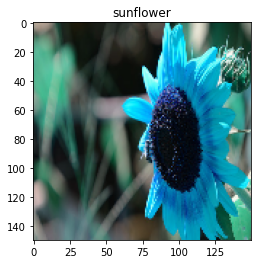

In [12]:
plt.imshow(data[233])
plt.title('{}'.format(labels[233]))

In [13]:
v = []
for i in labels:
    if i not in v:
        v.append(i)
print(v)

['sunflower', 'tulip', 'rose', 'dandelion', 'daisy']


In [14]:
labels = list(labels)

In [15]:
v = list(v)

In [16]:
for i,j in enumerate(labels):
    for index, item in enumerate(v):
        if j == item:
            labels[i] = index 

In [18]:
labels[1000:1020]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [19]:
labels = np.array(labels)

In [20]:
encoded = to_categorical(labels)

In [21]:
encoded

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [22]:
encoded.shape

(4322, 5)

In [23]:
data[1].shape

(150, 150, 3)

In [24]:
data = [np.array(i) for i in data]

In [26]:
data[-5]

array([[[138, 138, 138],
        [162, 162, 162],
        [166, 166, 166],
        ...,
        [167, 167, 167],
        [163, 163, 163],
        [135, 135, 135]],

       [[180, 180, 180],
        [220, 220, 220],
        [230, 230, 230],
        ...,
        [230, 230, 230],
        [217, 217, 217],
        [177, 177, 177]],

       [[188, 188, 188],
        [231, 231, 231],
        [239, 239, 239],
        ...,
        [241, 241, 241],
        [229, 229, 229],
        [186, 186, 186]],

       ...,

       [[211, 211, 211],
        [230, 230, 230],
        [239, 239, 239],
        ...,
        [240, 240, 240],
        [228, 228, 228],
        [213, 213, 213]],

       [[203, 203, 203],
        [219, 219, 219],
        [228, 228, 228],
        ...,
        [231, 231, 231],
        [217, 217, 217],
        [207, 207, 207]],

       [[196, 196, 196],
        [205, 205, 205],
        [216, 216, 216],
        ...,
        [212, 212, 212],
        [205, 205, 205],
        [199, 199, 199]]

In [27]:
data = [i/255 for i in data]

In [28]:
data[-5]

array([[[0.54117647, 0.54117647, 0.54117647],
        [0.63529412, 0.63529412, 0.63529412],
        [0.65098039, 0.65098039, 0.65098039],
        ...,
        [0.65490196, 0.65490196, 0.65490196],
        [0.63921569, 0.63921569, 0.63921569],
        [0.52941176, 0.52941176, 0.52941176]],

       [[0.70588235, 0.70588235, 0.70588235],
        [0.8627451 , 0.8627451 , 0.8627451 ],
        [0.90196078, 0.90196078, 0.90196078],
        ...,
        [0.90196078, 0.90196078, 0.90196078],
        [0.85098039, 0.85098039, 0.85098039],
        [0.69411765, 0.69411765, 0.69411765]],

       [[0.7372549 , 0.7372549 , 0.7372549 ],
        [0.90588235, 0.90588235, 0.90588235],
        [0.9372549 , 0.9372549 , 0.9372549 ],
        ...,
        [0.94509804, 0.94509804, 0.94509804],
        [0.89803922, 0.89803922, 0.89803922],
        [0.72941176, 0.72941176, 0.72941176]],

       ...,

       [[0.82745098, 0.82745098, 0.82745098],
        [0.90196078, 0.90196078, 0.90196078],
        [0.9372549 , 0

In [61]:
x_train,x_test,y_train,y_test=train_test_split(data,encoded,test_size=0.20)

In [62]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [63]:
x_train = x_train.reshape(x_train.shape[0], 150, 150, 3)
x_test = x_test.reshape(x_test.shape[0], 150,150,3)

In [64]:
print(y_train[1])
print(y_train[-1])

[0. 0. 0. 0. 1.]
[0. 1. 0. 0. 0.]


In [65]:
# 5. Định nghĩa model
model = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))
# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten layer chuyển từ tensor sang vector

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=5, activation='softmax'))

/home/sonthanhnguyen/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), data_format="channels_first")`
  import sys


In [66]:
opt = Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 148, 74, 16)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 146, 72, 32)       4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 73, 36, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 71, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 35, 17, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 38080)            

In [68]:
H = model.fit(x=x_train, y=y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Train on 3457 samples, validate on 865 samples
Epoch 1/20
3457/3457 [==============================] - 55s 16ms/step - loss: 1.4242 - accuracy: 0.3781 - val_loss: 1.2565 - val_accuracy: 0.4821
Epoch 2/20
3457/3457 [==============================] - 51s 15ms/step - loss: 1.2510 - accuracy: 0.4811 - val_loss: 1.1491 - val_accuracy: 0.5249
Epoch 3/20
3457/3457 [==============================] - 54s 15ms/step - loss: 1.1854 - accuracy: 0.5132 - val_loss: 1.1108 - val_accuracy: 0.5584
Epoch 4/20
3457/3457 [==============================] - 54s 16ms/step - loss: 1.1593 - accuracy: 0.5273 - val_loss: 1.0838 - val_accuracy: 0.5780
Epoch 5/20
3457/3457 [==============================] - 56s 16ms/step - loss: 1.0908 - accuracy: 0.5768 - val_loss: 1.0407 - val_accuracy: 0.5954
Epoch 6/20
3457/3457 [==============================] - 56s 16ms/step - loss: 1.0586 - accuracy: 0.5771 - val_loss: 1.1195 - val_accuracy: 0.5503
Epoch 7/20
3457/3457 [==============================] - 51s 15ms/step - loss:

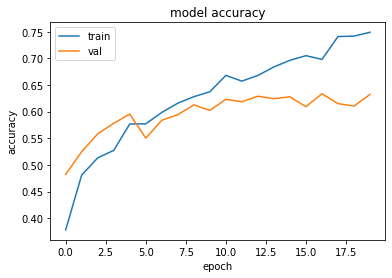

In [69]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

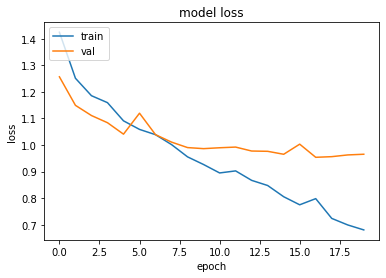

In [70]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [81]:
y_pred = model.predict_classes(x_test)

In [75]:
y_res = [np.argmax(i) for i in y_test]

In [78]:
y_res = np.array(y_res)

In [79]:
y_res

array([2, 3, 1, 3, 0, 1, 3, 0, 0, 0, 3, 3, 1, 3, 4, 4, 3, 1, 4, 0, 1, 4,
       2, 1, 1, 2, 2, 1, 0, 2, 1, 3, 0, 1, 2, 4, 4, 2, 3, 1, 0, 0, 0, 4,
       4, 1, 4, 3, 0, 0, 3, 2, 3, 4, 1, 1, 1, 3, 4, 1, 3, 2, 1, 2, 3, 0,
       4, 4, 2, 2, 4, 4, 1, 2, 1, 0, 0, 2, 4, 1, 1, 2, 2, 1, 2, 4, 4, 2,
       4, 2, 4, 2, 0, 3, 3, 3, 4, 4, 4, 3, 1, 3, 0, 0, 1, 0, 0, 1, 0, 1,
       3, 4, 2, 3, 0, 0, 1, 1, 2, 2, 2, 1, 3, 3, 4, 0, 3, 1, 0, 1, 2, 0,
       3, 3, 3, 1, 2, 2, 0, 1, 3, 1, 0, 4, 0, 0, 1, 2, 0, 3, 1, 0, 3, 4,
       3, 1, 1, 4, 3, 1, 1, 4, 1, 3, 1, 4, 3, 2, 0, 0, 4, 1, 0, 3, 1, 1,
       2, 3, 3, 1, 4, 0, 3, 3, 3, 4, 1, 0, 1, 3, 3, 3, 0, 3, 2, 1, 3, 1,
       4, 1, 3, 2, 3, 0, 3, 0, 4, 1, 0, 4, 1, 3, 2, 4, 2, 1, 2, 1, 0, 1,
       4, 4, 2, 3, 0, 2, 4, 2, 4, 3, 1, 3, 3, 0, 4, 1, 2, 1, 0, 4, 4, 1,
       3, 1, 1, 2, 2, 1, 1, 4, 2, 3, 0, 3, 3, 0, 1, 1, 1, 0, 3, 2, 1, 4,
       1, 3, 1, 2, 3, 1, 3, 1, 2, 1, 3, 4, 4, 1, 3, 1, 3, 0, 4, 3, 0, 4,
       1, 3, 3, 2, 3, 3, 0, 2, 4, 3, 1, 4, 2, 3, 4,

In [82]:
print("Accuracy :{:.2f}".format(100*accuracy_score(y_res, y_pred)) + '%')

Accuracy :63.24%


In [174]:
test_path = 'test'

In [175]:
for i in os.listdir(test_path):
    print(i)

dandelion1.jpg
sunflower.jpg
rose1.jpg
tulip.jpg
daisy1.jpg
rose.jpg
tulip1.jpg
sunflower1.jpg
dandelion.jpg
daisy.jpg


In [176]:
test_imgs = []
for i in os.listdir(test_path):
    print(i)
    img = cv2.imread(os.path.join(test_path, i))
    img = cv2.resize(img,(150,150))
    test_imgs.append(img)

dandelion1.jpg
sunflower.jpg
rose1.jpg
tulip.jpg
daisy1.jpg
rose.jpg
tulip1.jpg
sunflower1.jpg
dandelion.jpg
daisy.jpg


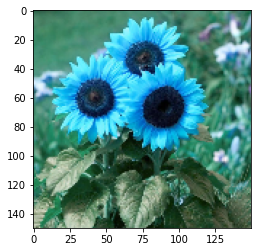

In [177]:
plt.imshow(test_imgs[1])

In [178]:
test_imgs_2_pred = [i/255 for i in test_imgs]

In [179]:
test_imgs_2_pred = np.array(test_imgs_2_pred)

In [180]:
test_imgs_2_pred[0]

array([[[0.        , 0.63921569, 0.76862745],
        [0.00784314, 0.68627451, 0.82745098],
        [0.03137255, 0.74117647, 0.89411765],
        ...,
        [0.        , 0.24313725, 0.1372549 ],
        [0.        , 0.23137255, 0.10588235],
        [0.00784314, 0.26666667, 0.12941176]],

       [[0.        , 0.64313725, 0.76862745],
        [0.00784314, 0.69019608, 0.81960784],
        [0.02352941, 0.74117647, 0.88235294],
        ...,
        [0.        , 0.25490196, 0.14117647],
        [0.        , 0.24705882, 0.12156863],
        [0.01176471, 0.28235294, 0.14901961]],

       [[0.        , 0.64705882, 0.76862745],
        [0.01568627, 0.69019608, 0.81568627],
        [0.02352941, 0.7372549 , 0.8745098 ],
        ...,
        [0.        , 0.2745098 , 0.15294118],
        [0.        , 0.2745098 , 0.14509804],
        [0.01176471, 0.31372549, 0.18039216]],

       ...,

       [[0.09019608, 0.74117647, 0.69019608],
        [0.08627451, 0.67843137, 0.61960784],
        [0.09411765, 0

In [181]:
test_labels = [
    'dandelion',
    'sunflower',
    'rose',
    'tulip',
    'daisy', 
    'rose',
    'tulip',
    'sunflower',
    'dandelion',
    'daisy'
    ]

In [182]:
for index, item in enumerate(test_labels):
    for i, j in enumerate (v):
        if item == j:
            test_labels[index] = i

In [183]:
test_labels

[3, 0, 2, 1, 4, 2, 1, 0, 3, 4]

In [184]:
y_pred1 = model.predict_classes(test_imgs_2_pred)

In [185]:
y_pred1 = list(y_pred1)

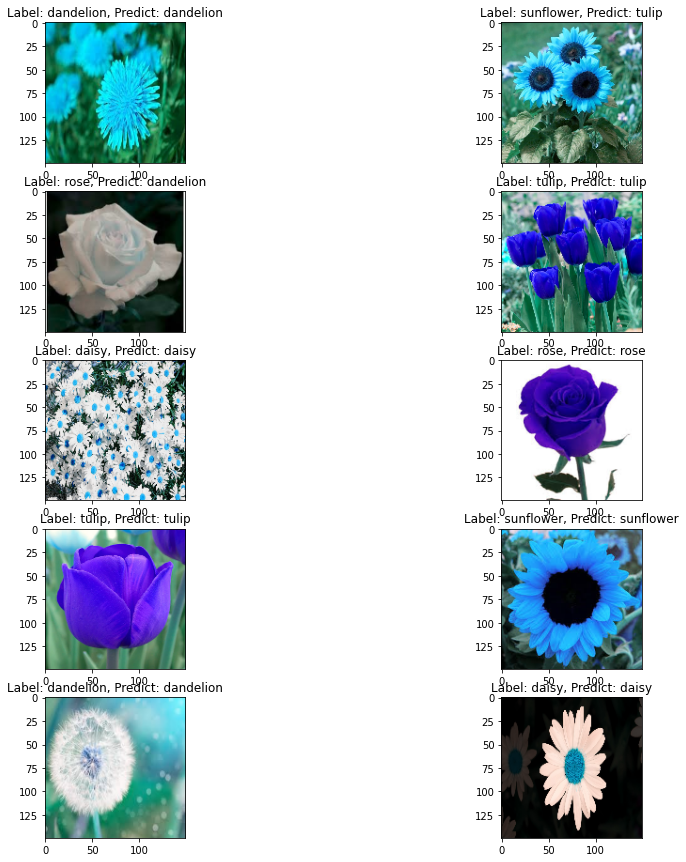

In [189]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
count  = 0
for i in range(5):
    for j in range(2):
        ax[i][j].imshow(test_imgs[count])
        ax[i][j].set_title('Label: {}, Predict: {}'.format(v[test_labels[count]], v[y_pred1[count]]))
        count += 1